In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is

In [4]:
from ml.preprocess import data
from utils import helper
from ml.models.base import brisk_xgboost, brisk_nn_pytorch

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


from dask_ml.preprocessing import StandardScaler
import xgboost as xgb

Prepare dataset

In [5]:

X, y = data.get_dataset(f_name = '20220319_covid_merge_processed.csv' , sep = ',')

X_tilda = X.drop(brisk_xgboost.DROP_LIST, axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X_tilda, y, test_size=0.25, random_state=123)

X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.25, random_state=123)


In [6]:

brisk_xgboost.N_TRIALS = 1000

In [7]:
xgb_model = brisk_xgboost.fetch_model()

2022-10-04 13:52:40,650 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ptpnb3tw', purging
2022-10-04 13:52:40,650 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-1zja6cnt', purging
2022-10-04 13:52:40,650 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-wbzfm7vx', purging
2022-10-04 13:52:40,650 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-jfhalt__', purging


Dask dashboard is available at http://127.0.0.1:8787/status
Starting train for trials:1000 with boosted rounds:150


2022-10-04 13:56:38,016 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-10-04 13:56:42,272 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-10-04 13:56:43,680 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-10-04 13:56:45,626 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-10-04 13:56:46,351 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-10-04 13:56:47,416 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-10-04 13:56:49,295 - distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
2022-10-04 13:56:49,738 - distributed.utils_perf - WARNING - full garbage collections took

Number of trials: 1000
Best trial:
Number of trials: 1000
Best trial:
  Value: 476439.1133475847
  Params: 
    booster: gbtree
    lambda: 1.0064988915518038e-07
    alpha: 0.8739295715128191
    max_depth: 2
    eta: 0.2877978232723007
    gamma: 0.919441848568315
    grow_policy: lossguide


In [17]:
# xgb_model.save_model('/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/base/xgboost/xgboost.json')

In [93]:
model_xgb_2 = xgb.Booster()
model_xgb_2.load_model('/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/base/xgboost/xgboost.json')


In [88]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [98]:
# x_pred = xgb_model.predict(dtest)
x_pred = model_xgb_2.predict(dtest)

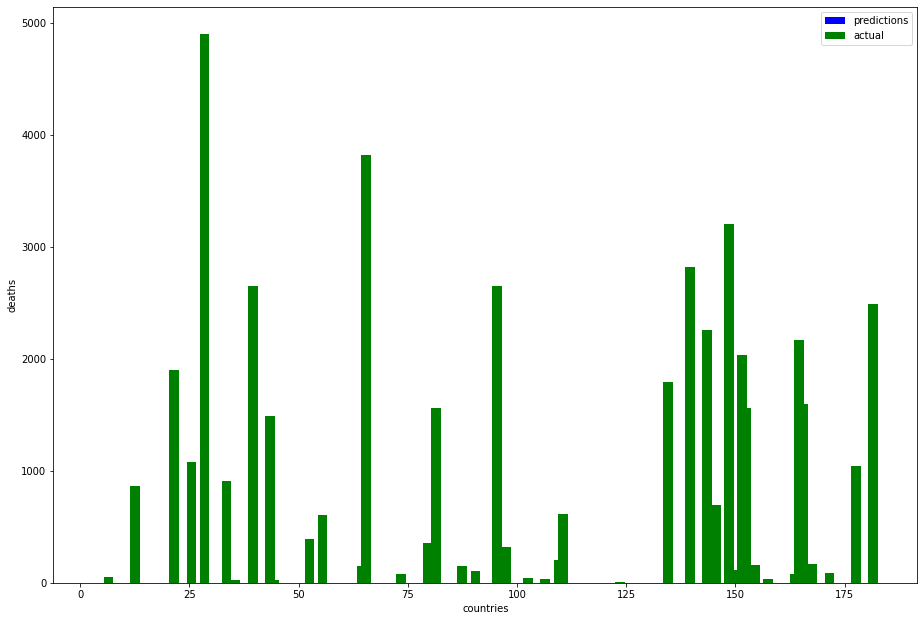

In [95]:
# plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_test_orig['location'].values + 0.0, x_pred, color = 'b', width = 2.25)
# ax.bar(X['location'].values + 0.25, y_test.values.reshape(48, ), color = 'g', width = 0.25)
ax.bar(X_test_orig['location'].values + 2.50, y_test.values.reshape(48, ), color = 'g', width = 2.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xlabel("countries")
plt.ylabel("deaths")
ax.legend(labels=['predictions', 'actual'])

In [99]:
df_xgbost = pd.DataFrame(list(zip(X_train_orig['location'].values, y_test.values.reshape(48, ), x_pred )),
               columns =['countary', 'deaths', 'predictions'])
df_xgbost

,countary,deaths,predictions
0,144,0.000,2.095772
1,154,4896.644,1.081382
2,157,1486.844,0.145046
3,8,55.799,0.185882
4,173,153.473,0.821746
5,80,2252.476,0.050443
6,52,146.353,0.094296
7,24,0.000,1.017841
8,82,604.743,0.183401
9,182,45.966,0.140653


In [97]:
err = np.round_(mean_squared_error( y_test.values.reshape(48, ), x_pred), decimals=2, out=None)
print(err)

2353968.02


### Fitting DNN

In [6]:
nn_model = brisk_neural_net.fetch_model(save = False)

2022-09-27 18:37:22,149 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-ujnz0_hq', purging
2022-09-27 18:37:22,150 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-9b8ee2e1', purging
2022-09-27 18:37:22,150 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-6fk2yhmt', purging
2022-09-27 18:37:22,150 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-703gavgs', purging


Dask dashboard is available at http://127.0.0.1:8787/status


2022-09-27 18:37:30.988055: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-27 18:37:30.988126: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MININT-B74KKM5): /proc/driver/nvidia/version does not exist
2022-09-27 18:37:30.990042: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-27 18:37:31.017531: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-27 18:37:31.017586: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be runnin

2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:38:00,790] Trial 10 finished with value: 4156252.1 and parameters: {'learning_rate': 0.003701076959340632, 'batch_size': 512, 'n_layers': 1, 'n_units_l0': 247}. Best is trial 10 with value: 4156252.1.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:38:02,030] Trial 7 finished with value: 4154247.27 and parameters: {'learning_rate': 0.006115404652300812, 'batch_size': 512, 'n_layers': 4, 'n_units_l0': 15, 'n_units_l1': 205, 'n_units_l2': 235, 'n_units_l3': 147}. Best is trial 7 with value: 4154247.27.
[I 2022-09-27 18:38:02,160] Trial 5 finished with value: 2257210.45 and parameters: {'learning_rate': 0.008747555496827679, 'batch_size': 2048, 'n_layers': 3, 'n_units_l0': 132, 'n_units_l1': 5, 'n_units_l2': 105}. Best is trial 5 with value: 2257210.45.


2/2 [==============================] - 0s 7ms/step


[I 2022-09-27 18:38:02,797] Trial 0 finished with value: 4147555.15 and parameters: {'learning_rate': 0.013278071584490113, 'batch_size': 1024, 'n_layers': 3, 'n_units_l0': 2, 'n_units_l1': 217, 'n_units_l2': 137}. Best is trial 5 with value: 2257210.45.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:38:03,988] Trial 11 finished with value: 4116453.95 and parameters: {'learning_rate': 0.016347130895217377, 'batch_size': 64, 'n_layers': 2, 'n_units_l0': 168, 'n_units_l1': 121}. Best is trial 5 with value: 2257210.45.
[I 2022-09-27 18:38:04,013] Trial 3 finished with value: 2449128.99 and parameters: {'learning_rate': 0.09740710305608329, 'batch_size': 2048, 'n_layers': 5, 'n_units_l0': 52, 'n_units_l1': 52, 'n_units_l2': 170, 'n_units_l3': 229, 'n_units_l4': 15}. Best is trial 5 with value: 2257210.45.


2/2 [==============================] - 0s 10ms/step


[I 2022-09-27 18:38:04,282] Trial 20 finished with value: 4144602.89 and parameters: {'learning_rate': 0.008401970487630547, 'batch_size': 128, 'n_layers': 5, 'n_units_l0': 203, 'n_units_l1': 74, 'n_units_l2': 173, 'n_units_l3': 85, 'n_units_l4': 163}. Best is trial 5 with value: 2257210.45.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:38:08,291] Trial 9 finished with value: 4152193.22 and parameters: {'learning_rate': 0.0017210321311371404, 'batch_size': 32, 'n_layers': 4, 'n_units_l0': 200, 'n_units_l1': 154, 'n_units_l2': 45, 'n_units_l3': 7}. Best is trial 5 with value: 2257210.45.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:38:17,957] Trial 8 finished with value: 4153773.93 and parameters: {'learning_rate': 0.006637982093982565, 'batch_size': 1024, 'n_layers': 1, 'n_units_l0': 68}. Best is trial 5 with value: 2257210.45.


2/2 [==============================] - 0s 7ms/step


[I 2022-09-27 18:38:18,218] Trial 17 finished with value: 839448.56 and parameters: {'learning_rate': 0.045410323545057515, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 206, 'n_units_l1': 192}. Best is trial 17 with value: 839448.56.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:38:21,322] Trial 4 finished with value: 833290.29 and parameters: {'learning_rate': 0.02240436956635254, 'batch_size': 16, 'n_layers': 5, 'n_units_l0': 85, 'n_units_l1': 155, 'n_units_l2': 169, 'n_units_l3': 221, 'n_units_l4': 81}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:38:25,192] Trial 18 finished with value: 1140516.7 and parameters: {'learning_rate': 0.002957915929787215, 'batch_size': 2048, 'n_layers': 2, 'n_units_l0': 225, 'n_units_l1': 36}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 7ms/step


[I 2022-09-27 18:38:29,526] Trial 6 finished with value: 1979088.28 and parameters: {'learning_rate': 0.0013964704214329859, 'batch_size': 128, 'n_layers': 3, 'n_units_l0': 233, 'n_units_l1': 227, 'n_units_l2': 255}. Best is trial 4 with value: 833290.29.
[I 2022-09-27 18:38:29,727] Trial 22 finished with value: 4114837.99 and parameters: {'learning_rate': 0.05044137149005223, 'batch_size': 1024, 'n_layers': 4, 'n_units_l0': 16, 'n_units_l1': 55, 'n_units_l2': 98, 'n_units_l3': 86}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 7ms/step


[I 2022-09-27 18:38:32,238] Trial 14 finished with value: 4133999.2 and parameters: {'learning_rate': 0.028250154382773028, 'batch_size': 1024, 'n_layers': 5, 'n_units_l0': 48, 'n_units_l1': 89, 'n_units_l2': 53, 'n_units_l3': 88, 'n_units_l4': 43}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 1s 17ms/step


[I 2022-09-27 18:38:41,913] Trial 21 finished with value: 4046368.99 and parameters: {'learning_rate': 0.02711715526297074, 'batch_size': 32, 'n_layers': 3, 'n_units_l0': 185, 'n_units_l1': 154, 'n_units_l2': 187}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 8ms/step


[I 2022-09-27 18:38:45,247] Trial 19 finished with value: 1040776.61 and parameters: {'learning_rate': 0.0012135154990735228, 'batch_size': 1024, 'n_layers': 2, 'n_units_l0': 250, 'n_units_l1': 245}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 9ms/step


[I 2022-09-27 18:38:59,559] Trial 15 finished with value: 3937965.88 and parameters: {'learning_rate': 0.016218907228580128, 'batch_size': 8, 'n_layers': 4, 'n_units_l0': 103, 'n_units_l1': 83, 'n_units_l2': 225, 'n_units_l3': 171}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 1s 19ms/step


[I 2022-09-27 18:39:03,435] Trial 2 finished with value: 3722415.23 and parameters: {'learning_rate': 0.06518518815554349, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 251, 'n_units_l1': 237}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:39:12,771] Trial 16 finished with value: 3917367.24 and parameters: {'learning_rate': 0.03418015082023216, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 103, 'n_units_l1': 171}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:39:17,096] Trial 13 finished with value: 3597404.05 and parameters: {'learning_rate': 0.0870487038208466, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 105, 'n_units_l1': 163}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 1s 9ms/step


[I 2022-09-27 18:39:17,985] Trial 23 finished with value: 3868474.26 and parameters: {'learning_rate': 0.04172535631327051, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 163}. Best is trial 4 with value: 833290.29.
[I 2022-09-27 18:39:18,157] Trial 26 finished with value: 3851207.62 and parameters: {'learning_rate': 0.044385049198383306, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 100, 'n_units_l1': 160}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 15ms/step


[I 2022-09-27 18:39:18,748] Trial 25 finished with value: 3819728.67 and parameters: {'learning_rate': 0.04944221487147703, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 100, 'n_units_l1': 256}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:39:22,094] Trial 35 finished with value: 3566479.18 and parameters: {'learning_rate': 0.09274281278357956, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 107, 'n_units_l1': 179}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:39:24,195] Trial 36 finished with value: 3670235.08 and parameters: {'learning_rate': 0.07411409630945621, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 100, 'n_units_l1': 181}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 17ms/step


[I 2022-09-27 18:39:27,324] Trial 34 finished with value: 851986.5 and parameters: {'learning_rate': 0.0928841046135768, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 101, 'n_units_l1': 183}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:39:45,295] Trial 47 finished with value: 4101777.01 and parameters: {'learning_rate': 0.022254180253798096, 'batch_size': 64, 'n_layers': 1, 'n_units_l0': 150}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:39:46,240] Trial 1 finished with value: 1741143.91 and parameters: {'learning_rate': 0.08719147483969794, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 144, 'n_units_l1': 189}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:39:47,716] Trial 12 finished with value: 3843518.69 and parameters: {'learning_rate': 0.045634874795934297, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 93, 'n_units_l1': 165}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:39:48,960] Trial 28 finished with value: 2416733.68 and parameters: {'learning_rate': 0.019868614090905692, 'batch_size': 64, 'n_layers': 1, 'n_units_l0': 138}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:39:54,844] Trial 33 finished with value: 1013619.39 and parameters: {'learning_rate': 0.03215801361770402, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 96, 'n_units_l1': 168}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:39:57,301] Trial 46 finished with value: 4093764.7 and parameters: {'learning_rate': 0.02548707559085752, 'batch_size': 64, 'n_layers': 1, 'n_units_l0': 159}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:40:05,764] Trial 29 finished with value: 3986231.36 and parameters: {'learning_rate': 0.023964034169646937, 'batch_size': 16, 'n_layers': 1, 'n_units_l0': 147}. Best is trial 4 with value: 833290.29.
[I 2022-09-27 18:40:05,778] Trial 32 finished with value: 4016648.3 and parameters: {'learning_rate': 0.019604439646319246, 'batch_size': 16, 'n_layers': 1, 'n_units_l0': 148}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:40:17,657] Trial 42 finished with value: 3881156.14 and parameters: {'learning_rate': 0.020675436710183338, 'batch_size': 8, 'n_layers': 1, 'n_units_l0': 162}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:40:18,308] Trial 40 finished with value: 8958260.4 and parameters: {'learning_rate': 0.02534084661428586, 'batch_size': 8, 'n_layers': 1, 'n_units_l0': 144}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:40:30,810] Trial 49 finished with value: 1126084.9 and parameters: {'learning_rate': 0.02097921365355059, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 68, 'n_units_l1': 123, 'n_units_l2': 16}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 10ms/step


[I 2022-09-27 18:40:33,720] Trial 45 finished with value: 3676161.63 and parameters: {'learning_rate': 0.021775897494808984, 'batch_size': 8, 'n_layers': 1, 'n_units_l0': 150}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:40:52,478] Trial 48 finished with value: 3993425.86 and parameters: {'learning_rate': 0.011958661194663836, 'batch_size': 8, 'n_layers': 1, 'n_units_l0': 72}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:40:55,549] Trial 24 finished with value: 932030.28 and parameters: {'learning_rate': 0.028557919933481495, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 68, 'n_units_l1': 255, 'n_units_l2': 212}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:41:03,448] Trial 43 finished with value: 1808230.91 and parameters: {'learning_rate': 0.0116806955281234, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 70, 'n_units_l1': 129, 'n_units_l2': 5}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 7ms/step


[I 2022-09-27 18:41:06,053] Trial 27 finished with value: 3993688.02 and parameters: {'learning_rate': 0.011952256796030064, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 73, 'n_units_l1': 127, 'n_units_l2': 16}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:41:07,599] Trial 31 finished with value: 3971066.51 and parameters: {'learning_rate': 0.013662303864993779, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 74, 'n_units_l1': 127, 'n_units_l2': 206}. Best is trial 4 with value: 833290.29.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:41:14,693] Trial 37 finished with value: 824881.69 and parameters: {'learning_rate': 0.0625802703780383, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 123, 'n_units_l1': 139, 'n_units_l2': 200}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:41:24,540] Trial 30 finished with value: 1225745.04 and parameters: {'learning_rate': 0.0654960687190766, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 123, 'n_units_l1': 200, 'n_units_l2': 205}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:41:29,384] Trial 39 finished with value: 923744.58 and parameters: {'learning_rate': 0.057045177962462515, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 118, 'n_units_l1': 137, 'n_units_l2': 201}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:41:35,778] Trial 41 finished with value: 4101126.77 and parameters: {'learning_rate': 0.06667119664818809, 'batch_size': 512, 'n_layers': 4, 'n_units_l0': 121, 'n_units_l1': 205, 'n_units_l2': 145, 'n_units_l3': 233}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:41:41,016] Trial 44 finished with value: 1036479.13 and parameters: {'learning_rate': 0.06231211963092314, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 118, 'n_units_l1': 206, 'n_units_l2': 210}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 10ms/step


[I 2022-09-27 18:41:55,249] Trial 38 finished with value: 1133198.72 and parameters: {'learning_rate': 0.0605619346693014, 'batch_size': 512, 'n_layers': 4, 'n_units_l0': 123, 'n_units_l1': 141, 'n_units_l2': 141, 'n_units_l3': 247}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 7ms/step


[I 2022-09-27 18:42:14,498] Trial 64 finished with value: 3633143.74 and parameters: {'learning_rate': 0.08064912655542113, 'batch_size': 16, 'n_layers': 5, 'n_units_l0': 86, 'n_units_l1': 140, 'n_units_l2': 254, 'n_units_l3': 197, 'n_units_l4': 254}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:42:16,417] Trial 70 finished with value: 3785483.82 and parameters: {'learning_rate': 0.054910562637145104, 'batch_size': 16, 'n_layers': 4, 'n_units_l0': 117, 'n_units_l1': 139, 'n_units_l2': 161, 'n_units_l3': 255}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:42:19,998] Trial 55 finished with value: 3649183.19 and parameters: {'learning_rate': 0.09978129139059827, 'batch_size': 16, 'n_layers': 5, 'n_units_l0': 43, 'n_units_l1': 142, 'n_units_l2': 244, 'n_units_l3': 252, 'n_units_l4': 254}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:42:22,273] Trial 51 finished with value: 3541524.86 and parameters: {'learning_rate': 0.09980029824234164, 'batch_size': 16, 'n_layers': 5, 'n_units_l0': 85, 'n_units_l1': 142, 'n_units_l2': 256, 'n_units_l3': 253, 'n_units_l4': 89}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:42:31,222] Trial 71 finished with value: 3640208.01 and parameters: {'learning_rate': 0.07937573967842695, 'batch_size': 16, 'n_layers': 4, 'n_units_l0': 45, 'n_units_l1': 142, 'n_units_l2': 160, 'n_units_l3': 256}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:42:35,330] Trial 53 finished with value: 3773247.5 and parameters: {'learning_rate': 0.05681878860428994, 'batch_size': 16, 'n_layers': 5, 'n_units_l0': 118, 'n_units_l1': 143, 'n_units_l2': 252, 'n_units_l3': 197, 'n_units_l4': 255}. Best is trial 37 with value: 824881.69.
[I 2022-09-27 18:42:35,479] Trial 66 finished with value: 2432012.78 and parameters: {'learning_rate': 0.05554466011706835, 'batch_size': 16, 'n_layers': 5, 'n_units_l0': 117, 'n_units_l1': 146, 'n_units_l2': 253, 'n_units_l3': 256, 'n_units_l4': 249}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:42:52,880] Trial 57 finished with value: 4103605.41 and parameters: {'learning_rate': 0.03236159573559929, 'batch_size': 128, 'n_layers': 3, 'n_units_l0': 57, 'n_units_l1': 108, 'n_units_l2': 188}. Best is trial 37 with value: 824881.69.
[I 2022-09-27 18:42:53,027] Trial 56 finished with value: 4088944.32 and parameters: {'learning_rate': 0.04095791628060181, 'batch_size': 128, 'n_layers': 3, 'n_units_l0': 55, 'n_units_l1': 108, 'n_units_l2': 185}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 1s 9ms/step


[I 2022-09-27 18:42:55,723] Trial 65 finished with value: 4094678.1 and parameters: {'learning_rate': 0.03774867726754042, 'batch_size': 128, 'n_layers': 3, 'n_units_l0': 30, 'n_units_l1': 108, 'n_units_l2': 192}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:43:10,549] Trial 69 finished with value: 1496729.35 and parameters: {'learning_rate': 0.035793084374409354, 'batch_size': 2048, 'n_layers': 3, 'n_units_l0': 82, 'n_units_l1': 218, 'n_units_l2': 217}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 1s 2ms/step


[I 2022-09-27 18:43:12,315] Trial 62 finished with value: 1760716.51 and parameters: {'learning_rate': 0.03750207941653241, 'batch_size': 2048, 'n_layers': 2, 'n_units_l0': 182, 'n_units_l1': 222}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:43:19,682] Trial 54 finished with value: 4004436.42 and parameters: {'learning_rate': 0.03797851209883376, 'batch_size': 32, 'n_layers': 3, 'n_units_l0': 136, 'n_units_l1': 224, 'n_units_l2': 223}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 12ms/step


[I 2022-09-27 18:43:36,196] Trial 52 finished with value: 1138882.57 and parameters: {'learning_rate': 0.028951998775739802, 'batch_size': 32, 'n_layers': 2, 'n_units_l0': 132, 'n_units_l1': 184}. Best is trial 37 with value: 824881.69.
[I 2022-09-27 18:43:36,257] Trial 58 finished with value: 1877807.82 and parameters: {'learning_rate': 0.03019728300418756, 'batch_size': 32, 'n_layers': 2, 'n_units_l0': 134, 'n_units_l1': 193}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:43:49,162] Trial 67 finished with value: 1227041.32 and parameters: {'learning_rate': 0.030066194388450772, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 91, 'n_units_l1': 191}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 1s 10ms/step


[I 2022-09-27 18:44:08,215] Trial 61 finished with value: 1390010.33 and parameters: {'learning_rate': 0.0161502182482504, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 109, 'n_units_l1': 168}. Best is trial 37 with value: 824881.69.
[I 2022-09-27 18:44:08,218] Trial 60 finished with value: 3827792.67 and parameters: {'learning_rate': 0.048039029560042, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 90, 'n_units_l1': 170}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:44:24,908] Trial 68 finished with value: 4047564.64 and parameters: {'learning_rate': 0.015208001701907477, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 107, 'n_units_l1': 239}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:44:33,786] Trial 50 finished with value: 1327928.47 and parameters: {'learning_rate': 0.07049148996709574, 'batch_size': 1024, 'n_layers': 2, 'n_units_l0': 61, 'n_units_l1': 176}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:44:40,098] Trial 59 finished with value: 4096782.0 and parameters: {'learning_rate': 0.07185660719802033, 'batch_size': 1024, 'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 155, 'n_units_l2': 113}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:44:43,086] Trial 63 finished with value: 3837298.93 and parameters: {'learning_rate': 0.04651108974024636, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 79, 'n_units_l1': 234}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:45:03,768] Trial 91 finished with value: 3862440.15 and parameters: {'learning_rate': 0.042705441269915295, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 233, 'n_units_l1': 157, 'n_units_l2': 121}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:45:04,578] Trial 88 finished with value: 3851928.48 and parameters: {'learning_rate': 0.044369565914821475, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 216, 'n_units_l1': 156, 'n_units_l2': 173}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:45:13,300] Trial 89 finished with value: 1052785.8 and parameters: {'learning_rate': 0.04426613191300241, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 78, 'n_units_l1': 154, 'n_units_l2': 115}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 9ms/step


[I 2022-09-27 18:45:14,761] Trial 84 finished with value: 3821793.99 and parameters: {'learning_rate': 0.04902716543045212, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 210, 'n_units_l1': 155, 'n_units_l2': 116}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:45:15,837] Trial 83 finished with value: 3837231.0 and parameters: {'learning_rate': 0.04658872780889918, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 237, 'n_units_l1': 256, 'n_units_l2': 124}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:45:34,953] Trial 79 finished with value: 4104502.69 and parameters: {'learning_rate': 0.06265377405524028, 'batch_size': 512, 'n_layers': 4, 'n_units_l0': 111, 'n_units_l1': 208, 'n_units_l2': 209, 'n_units_l3': 23}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:45:45,845] Trial 93 finished with value: 1226356.78 and parameters: {'learning_rate': 0.06151950989489619, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 114, 'n_units_l1': 195, 'n_units_l2': 205}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:45:48,912] Trial 90 finished with value: 3740791.07 and parameters: {'learning_rate': 0.06224859229982086, 'batch_size': 16, 'n_layers': 4, 'n_units_l0': 127, 'n_units_l1': 208, 'n_units_l2': 236, 'n_units_l3': 120}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:46:07,413] Trial 72 finished with value: 4160406.32 and parameters: {'learning_rate': 0.08749768804187179, 'batch_size': 16, 'n_layers': 4, 'n_units_l0': 96, 'n_units_l1': 212, 'n_units_l2': 234, 'n_units_l3': 119}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:46:15,581] Trial 78 finished with value: 3580287.42 and parameters: {'learning_rate': 0.09027860995618206, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 128, 'n_units_l1': 211}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:46:18,574] Trial 74 finished with value: 1583510.5 and parameters: {'learning_rate': 0.018360710124712545, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 97, 'n_units_l1': 116}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:46:25,712] Trial 81 finished with value: 4151612.44 and parameters: {'learning_rate': 0.00897444730703227, 'batch_size': 1024, 'n_layers': 2, 'n_units_l0': 247, 'n_units_l1': 246}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:46:32,684] Trial 77 finished with value: 1136265.21 and parameters: {'learning_rate': 0.001096075791657417, 'batch_size': 1024, 'n_layers': 2, 'n_units_l0': 255, 'n_units_l1': 247}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:46:35,382] Trial 73 finished with value: 4157361.85 and parameters: {'learning_rate': 0.002098078579555167, 'batch_size': 1024, 'n_layers': 2, 'n_units_l0': 250, 'n_units_l1': 240}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:46:42,292] Trial 85 finished with value: 4157257.2 and parameters: {'learning_rate': 0.0022645281021015217, 'batch_size': 1024, 'n_layers': 2, 'n_units_l0': 61, 'n_units_l1': 175}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:46:49,202] Trial 75 finished with value: 4157307.54 and parameters: {'learning_rate': 0.00218507845045037, 'batch_size': 1024, 'n_layers': 2, 'n_units_l0': 63, 'n_units_l1': 185}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 1s 9ms/step


[I 2022-09-27 18:46:55,682] Trial 92 finished with value: 1024914.6 and parameters: {'learning_rate': 0.03322490859955932, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 141, 'n_units_l1': 185, 'n_units_l2': 196}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:47:02,381] Trial 86 finished with value: 1056492.34 and parameters: {'learning_rate': 0.0524631652421, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 140, 'n_units_l1': 134, 'n_units_l2': 198}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:47:09,673] Trial 80 finished with value: 941542.55 and parameters: {'learning_rate': 0.024801894181534077, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 140, 'n_units_l1': 134, 'n_units_l2': 177}. Best is trial 37 with value: 824881.69.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:47:18,041] Trial 87 finished with value: 806034.71 and parameters: {'learning_rate': 0.031956940554356585, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 142, 'n_units_l1': 197, 'n_units_l2': 192}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:47:23,866] Trial 82 finished with value: 4118497.2 and parameters: {'learning_rate': 0.004810956026873914, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 181, 'n_units_l1': 199, 'n_units_l2': 180}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:47:30,777] Trial 76 finished with value: 1381830.58 and parameters: {'learning_rate': 0.026779494801433202, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 182, 'n_units_l1': 199, 'n_units_l2': 180}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:47:41,011] Trial 96 finished with value: 4074578.56 and parameters: {'learning_rate': 0.03334013401495088, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 157, 'n_units_l1': 168, 'n_units_l2': 172}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:47:41,475] Trial 97 finished with value: 1082106.66 and parameters: {'learning_rate': 0.024328144050775675, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 159, 'n_units_l1': 200, 'n_units_l2': 177}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:47:48,359] Trial 100 finished with value: 4075271.08 and parameters: {'learning_rate': 0.033018065119867324, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 175, 'n_units_l1': 199, 'n_units_l2': 180}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:47:48,393] Trial 110 finished with value: 4075468.61 and parameters: {'learning_rate': 0.03282940316116021, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 176, 'n_units_l1': 199, 'n_units_l2': 180}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 26ms/step


[I 2022-09-27 18:47:48,762] Trial 95 finished with value: 4098259.05 and parameters: {'learning_rate': 0.023729022169710182, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 157, 'n_units_l1': 200, 'n_units_l2': 178}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 10ms/step


[I 2022-09-27 18:48:10,138] Trial 109 finished with value: 4111944.38 and parameters: {'learning_rate': 0.018138032823457457, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 192, 'n_units_l1': 149, 'n_units_l2': 157}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:48:10,140] Trial 114 finished with value: 966505.12 and parameters: {'learning_rate': 0.03937177311160953, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 143, 'n_units_l1': 184, 'n_units_l2': 161}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:48:10,254] Trial 115 finished with value: 4099556.46 and parameters: {'learning_rate': 0.02315296832819433, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 141, 'n_units_l1': 118, 'n_units_l2': 161}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 6ms/step


[I 2022-09-27 18:48:33,866] Trial 99 finished with value: 4061661.09 and parameters: {'learning_rate': 0.03894108964643311, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 125, 'n_units_l1': 163, 'n_units_l2': 194}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:48:34,056] Trial 103 finished with value: 4088408.1 and parameters: {'learning_rate': 0.027743071376351024, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 131, 'n_units_l1': 176, 'n_units_l2': 197}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:48:34,067] Trial 107 finished with value: 827307.29 and parameters: {'learning_rate': 0.04019139008316723, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 103, 'n_units_l1': 186, 'n_units_l2': 196}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 9ms/step


[I 2022-09-27 18:49:17,909] Trial 94 finished with value: 961326.82 and parameters: {'learning_rate': 0.030096295895534263, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 103, 'n_units_l1': 132, 'n_units_l2': 135}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 9ms/step


[I 2022-09-27 18:49:18,130] Trial 101 finished with value: 1086791.26 and parameters: {'learning_rate': 0.0413115303171614, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 99, 'n_units_l1': 131, 'n_units_l2': 146}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:49:18,279] Trial 104 finished with value: 3648743.4 and parameters: {'learning_rate': 0.0403479760524695, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 105, 'n_units_l1': 130, 'n_units_l2': 134}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:49:37,772] Trial 113 finished with value: 4133227.12 and parameters: {'learning_rate': 0.02912748256933816, 'batch_size': 2048, 'n_layers': 3, 'n_units_l0': 111, 'n_units_l1': 150, 'n_units_l2': 216}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:50:00,714] Trial 111 finished with value: 864717.24 and parameters: {'learning_rate': 0.029676679688889637, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 123, 'n_units_l2': 87}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 23ms/step


[I 2022-09-27 18:50:04,122] Trial 106 finished with value: 930594.91 and parameters: {'learning_rate': 0.03025025019344259, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 136, 'n_units_l2': 216}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:50:24,697] Trial 108 finished with value: 3689275.44 and parameters: {'learning_rate': 0.03674201212034615, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 166, 'n_units_l1': 134, 'n_units_l2': 84}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:50:48,245] Trial 112 finished with value: 3815995.93 and parameters: {'learning_rate': 0.025947792825912048, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 112, 'n_units_l2': 81}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 14ms/step


[I 2022-09-27 18:50:50,735] Trial 105 finished with value: 952586.5 and parameters: {'learning_rate': 0.026256734733248126, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 105, 'n_units_l1': 115, 'n_units_l2': 86}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:51:07,503] Trial 102 finished with value: 3820086.75 and parameters: {'learning_rate': 0.0255748563834678, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 121, 'n_units_l2': 93}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:51:32,685] Trial 98 finished with value: 3759253.58 and parameters: {'learning_rate': 0.03064507585503088, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 102, 'n_units_l1': 123, 'n_units_l2': 201}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:51:55,002] Trial 138 finished with value: 3868683.77 and parameters: {'learning_rate': 0.02164403219144031, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 92, 'n_units_l1': 101, 'n_units_l2': 55}. Best is trial 87 with value: 806034.71.


1/2 [==============>...............] - ETA: 0s

[I 2022-09-27 18:52:00,276] Trial 128 finished with value: 2372710.95 and parameters: {'learning_rate': 0.020183620542960506, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 93, 'n_units_l1': 123, 'n_units_l2': 62}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 12ms/step


[I 2022-09-27 18:52:00,501] Trial 119 finished with value: 3887246.14 and parameters: {'learning_rate': 0.02015494953111456, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 93, 'n_units_l1': 120, 'n_units_l2': 53}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:52:00,566] Trial 121 finished with value: 3930029.4 and parameters: {'learning_rate': 0.0782191653024573, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 97, 'n_units_l2': 93}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:52:07,923] Trial 131 finished with value: 889578.38 and parameters: {'learning_rate': 0.019107337337886655, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 93, 'n_units_l1': 95, 'n_units_l2': 60}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 32ms/step


[I 2022-09-27 18:52:08,375] Trial 117 finished with value: 3901391.84 and parameters: {'learning_rate': 0.019010323149083852, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 94, 'n_units_l1': 93, 'n_units_l2': 92}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:52:16,881] Trial 139 finished with value: 3907052.05 and parameters: {'learning_rate': 0.01861399697898802, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 123, 'n_units_l1': 98, 'n_units_l2': 69}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:52:21,832] Trial 127 finished with value: 3894385.61 and parameters: {'learning_rate': 0.019638406855952494, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 122, 'n_units_l1': 91, 'n_units_l2': 61}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:52:50,018] Trial 124 finished with value: 1139639.82 and parameters: {'learning_rate': 0.01814242093439835, 'batch_size': 8, 'n_layers': 4, 'n_units_l0': 113, 'n_units_l1': 136, 'n_units_l2': 226, 'n_units_l3': 207}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:52:56,269] Trial 136 finished with value: 4099297.97 and parameters: {'learning_rate': 0.014079739929020164, 'batch_size': 32, 'n_layers': 4, 'n_units_l0': 75, 'n_units_l1': 80, 'n_units_l2': 225, 'n_units_l3': 208}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:53:09,366] Trial 137 finished with value: 1220127.79 and parameters: {'learning_rate': 0.026663974684536833, 'batch_size': 8, 'n_layers': 4, 'n_units_l0': 74, 'n_units_l1': 136, 'n_units_l2': 219, 'n_units_l3': 205}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:53:09,398] Trial 135 finished with value: 940480.62 and parameters: {'learning_rate': 0.02799410309509955, 'batch_size': 8, 'n_layers': 4, 'n_units_l0': 83, 'n_units_l1': 74, 'n_units_l2': 223, 'n_units_l3': 206}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:53:15,725] Trial 132 finished with value: 4133982.1 and parameters: {'learning_rate': 0.028266079469048324, 'batch_size': 512, 'n_layers': 3, 'n_units_l0': 69, 'n_units_l1': 109, 'n_units_l2': 40}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:53:27,726] Trial 118 finished with value: 3490335.52 and parameters: {'learning_rate': 0.05534940765917487, 'batch_size': 8, 'n_layers': 4, 'n_units_l0': 111, 'n_units_l1': 139, 'n_units_l2': 225, 'n_units_l3': 212}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:53:29,396] Trial 116 finished with value: 1019921.88 and parameters: {'learning_rate': 0.035388682939347736, 'batch_size': 512, 'n_layers': 5, 'n_units_l0': 82, 'n_units_l1': 50, 'n_units_l2': 35, 'n_units_l3': 166, 'n_units_l4': 154}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:53:31,001] Trial 126 finished with value: 4123999.67 and parameters: {'learning_rate': 0.0528677966356939, 'batch_size': 512, 'n_layers': 5, 'n_units_l0': 67, 'n_units_l1': 60, 'n_units_l2': 213, 'n_units_l3': 169, 'n_units_l4': 148}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 17ms/step


[I 2022-09-27 18:53:38,671] Trial 122 finished with value: 4097575.49 and parameters: {'learning_rate': 0.035730649320791875, 'batch_size': 128, 'n_layers': 5, 'n_units_l0': 83, 'n_units_l1': 146, 'n_units_l2': 189, 'n_units_l3': 168, 'n_units_l4': 150}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:54:16,824] Trial 125 finished with value: 3849629.48 and parameters: {'learning_rate': 0.023194517823355548, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 106, 'n_units_l1': 58, 'n_units_l2': 212}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:54:18,110] Trial 120 finished with value: 1104293.25 and parameters: {'learning_rate': 0.023955235208656615, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 103, 'n_units_l1': 85, 'n_units_l2': 190}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:54:23,378] Trial 133 finished with value: 961927.89 and parameters: {'learning_rate': 0.024177725004304994, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 104, 'n_units_l1': 84, 'n_units_l2': 207}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:54:50,423] Trial 129 finished with value: 3942148.19 and parameters: {'learning_rate': 0.03047547019466162, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 99, 'n_units_l1': 4, 'n_units_l2': 203}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:55:02,675] Trial 130 finished with value: 3762719.61 and parameters: {'learning_rate': 0.030361246442903958, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 117, 'n_units_l1': 126, 'n_units_l2': 207}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:55:03,442] Trial 134 finished with value: 1417604.53 and parameters: {'learning_rate': 0.03146932972797409, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 100, 'n_units_l1': 71, 'n_units_l2': 204}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:55:20,225] Trial 123 finished with value: 988926.28 and parameters: {'learning_rate': 0.016327024753518625, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 116, 'n_units_l1': 103, 'n_units_l2': 231}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:55:29,883] Trial 143 finished with value: 4038488.89 and parameters: {'learning_rate': 0.01648514966102284, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 86, 'n_units_l1': 189, 'n_units_l2': 237}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:55:39,590] Trial 151 finished with value: 3701703.79 and parameters: {'learning_rate': 0.06871492611957875, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 87, 'n_units_l1': 18, 'n_units_l2': 105}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:55:41,654] Trial 162 finished with value: 1252739.18 and parameters: {'learning_rate': 0.01684309881860727, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 50, 'n_units_l1': 148, 'n_units_l2': 235}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:55:52,771] Trial 150 finished with value: 1016823.72 and parameters: {'learning_rate': 0.06924162153016124, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 104, 'n_units_l2': 236}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 13ms/step


[I 2022-09-27 18:55:54,288] Trial 163 finished with value: 3959415.63 and parameters: {'learning_rate': 0.027877661940186434, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 133, 'n_units_l1': 161, 'n_units_l2': 242}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:55:54,485] Trial 145 finished with value: 4038036.19 and parameters: {'learning_rate': 0.016543516224746615, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 134, 'n_units_l1': 14, 'n_units_l2': 107}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:55:54,666] Trial 159 finished with value: 919164.14 and parameters: {'learning_rate': 0.027360550399757416, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 52, 'n_units_l1': 114, 'n_units_l2': 231}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 20ms/step


[I 2022-09-27 18:56:17,702] Trial 167 finished with value: 4139735.19 and parameters: {'learning_rate': 0.021801377254056002, 'batch_size': 2048, 'n_layers': 3, 'n_units_l0': 57, 'n_units_l1': 114, 'n_units_l2': 186}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:56:17,837] Trial 168 finished with value: 4136304.52 and parameters: {'learning_rate': 0.02564259187149251, 'batch_size': 2048, 'n_layers': 3, 'n_units_l0': 36, 'n_units_l1': 126, 'n_units_l2': 199}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 7ms/step


[I 2022-09-27 18:56:31,100] Trial 156 finished with value: 4128189.8 and parameters: {'learning_rate': 0.03489449614427439, 'batch_size': 2048, 'n_layers': 3, 'n_units_l0': 37, 'n_units_l1': 112, 'n_units_l2': 185}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 20ms/step


[I 2022-09-27 18:56:46,789] Trial 160 finished with value: 4139383.5 and parameters: {'learning_rate': 0.022191836736864874, 'batch_size': 2048, 'n_layers': 3, 'n_units_l0': 40, 'n_units_l1': 115, 'n_units_l2': 221}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:56:48,235] Trial 169 finished with value: 938353.07 and parameters: {'learning_rate': 0.04925173704754006, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 72, 'n_units_l2': 218}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:56:49,142] Trial 164 finished with value: 3800440.59 and parameters: {'learning_rate': 0.027197153726345097, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 108, 'n_units_l1': 129, 'n_units_l2': 149}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 13ms/step


[I 2022-09-27 18:56:53,168] Trial 165 finished with value: 893472.44 and parameters: {'learning_rate': 0.03404866762096808, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 97, 'n_units_l1': 116, 'n_units_l2': 185}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:56:55,180] Trial 170 finished with value: 1923329.61 and parameters: {'learning_rate': 0.049859383810963255, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 64, 'n_units_l1': 73, 'n_units_l2': 215}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:57:11,367] Trial 166 finished with value: 965124.48 and parameters: {'learning_rate': 0.02913099037518212, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 135, 'n_units_l1': 128, 'n_units_l2': 168}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 15ms/step


[I 2022-09-27 18:57:14,663] Trial 171 finished with value: 860681.93 and parameters: {'learning_rate': 0.04918618226751897, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 109, 'n_units_l1': 75, 'n_units_l2': 221}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 5ms/step


[I 2022-09-27 18:57:17,293] Trial 147 finished with value: 1003763.67 and parameters: {'learning_rate': 0.027148323089984095, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 77, 'n_units_l1': 173, 'n_units_l2': 217}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:57:22,067] Trial 174 finished with value: 936231.85 and parameters: {'learning_rate': 0.045191906601793834, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 77, 'n_units_l1': 67, 'n_units_l2': 215}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:57:25,933] Trial 175 finished with value: 1134298.62 and parameters: {'learning_rate': 0.04953358625426602, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 75, 'n_units_l1': 180, 'n_units_l2': 214}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 16ms/step


[I 2022-09-27 18:57:31,584] Trial 161 finished with value: 3796378.36 and parameters: {'learning_rate': 0.027500641443706567, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 107, 'n_units_l1': 116, 'n_units_l2': 186}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 5ms/step


[I 2022-09-27 18:57:36,409] Trial 173 finished with value: 4057499.81 and parameters: {'learning_rate': 0.04039990720732484, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 76, 'n_units_l1': 78, 'n_units_l2': 79}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 8ms/step


[I 2022-09-27 18:57:46,771] Trial 176 finished with value: 4042687.18 and parameters: {'learning_rate': 0.04677092377844153, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 179, 'n_units_l2': 168}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 11ms/step


[I 2022-09-27 18:57:47,485] Trial 177 finished with value: 1049035.7 and parameters: {'learning_rate': 0.04622500054219157, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 79, 'n_units_l1': 64, 'n_units_l2': 168}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:58:04,032] Trial 179 finished with value: 4048031.93 and parameters: {'learning_rate': 0.04402982218072197, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 79, 'n_units_l1': 68, 'n_units_l2': 195}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:58:20,655] Trial 181 finished with value: 1161768.0 and parameters: {'learning_rate': 0.045644407768410625, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 67, 'n_units_l2': 228}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 5ms/step


[I 2022-09-27 18:58:22,160] Trial 157 finished with value: 835822.44 and parameters: {'learning_rate': 0.05722168180541444, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 95, 'n_units_l1': 68, 'n_units_l2': 229}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:58:24,064] Trial 178 finished with value: 1152915.87 and parameters: {'learning_rate': 0.044463699757795225, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 82, 'n_units_l1': 69, 'n_units_l2': 245}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 7ms/step


[I 2022-09-27 18:58:24,790] Trial 183 finished with value: 4047877.52 and parameters: {'learning_rate': 0.04453170712107063, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 95, 'n_units_l1': 72, 'n_units_l2': 227}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 15ms/step


[I 2022-09-27 18:58:28,042] Trial 172 finished with value: 972575.7 and parameters: {'learning_rate': 0.028750893414452982, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 74, 'n_units_l1': 70, 'n_units_l2': 216}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:58:28,223] Trial 182 finished with value: 1071867.04 and parameters: {'learning_rate': 0.041487448433479304, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 80, 'n_units_l1': 67, 'n_units_l2': 230}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:58:31,600] Trial 154 finished with value: 1102631.43 and parameters: {'learning_rate': 0.02759724698133869, 'batch_size': 8, 'n_layers': 3, 'n_units_l0': 76, 'n_units_l1': 68, 'n_units_l2': 166}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:58:32,145] Trial 184 finished with value: 1377044.32 and parameters: {'learning_rate': 0.058397491049892204, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 93, 'n_units_l1': 50, 'n_units_l2': 229}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 5ms/step


[I 2022-09-27 18:58:47,112] Trial 142 finished with value: 1057179.7 and parameters: {'learning_rate': 0.042041391246900116, 'batch_size': 64, 'n_layers': 2, 'n_units_l0': 82, 'n_units_l1': 64}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:58:52,297] Trial 185 finished with value: 4012577.86 and parameters: {'learning_rate': 0.05906514067517294, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 98, 'n_units_l1': 49, 'n_units_l2': 201}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 3ms/step


[I 2022-09-27 18:58:54,651] Trial 180 finished with value: 1029069.88 and parameters: {'learning_rate': 0.04475221019663995, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 67, 'n_units_l2': 230}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 9ms/step


[I 2022-09-27 18:58:59,934] Trial 186 finished with value: 3760345.86 and parameters: {'learning_rate': 0.05888882929174522, 'batch_size': 16, 'n_layers': 2, 'n_units_l0': 95, 'n_units_l1': 80}. Best is trial 87 with value: 806034.71.
[I 2022-09-27 18:59:00,111] Trial 153 finished with value: 821736.17 and parameters: {'learning_rate': 0.058059257467772324, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 95, 'n_units_l1': 49, 'n_units_l2': 210}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 10ms/step


[I 2022-09-27 18:59:06,509] Trial 190 finished with value: 861131.23 and parameters: {'learning_rate': 0.06007414919783816, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 92, 'n_units_l1': 79, 'n_units_l2': 210}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:59:07,420] Trial 149 finished with value: 1222465.13 and parameters: {'learning_rate': 0.06130091257280117, 'batch_size': 64, 'n_layers': 2, 'n_units_l0': 97, 'n_units_l1': 78}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 13ms/step


[I 2022-09-27 18:59:08,386] Trial 187 finished with value: 4012845.89 and parameters: {'learning_rate': 0.059520240067222646, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 96, 'n_units_l1': 63, 'n_units_l2': 28}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 9ms/step


[I 2022-09-27 18:59:09,872] Trial 189 finished with value: 967757.44 and parameters: {'learning_rate': 0.05401817734106634, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 99, 'n_units_l1': 190, 'n_units_l2': 210}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 6ms/step


[I 2022-09-27 18:59:30,901] Trial 146 finished with value: 3947118.86 and parameters: {'learning_rate': 0.05274875215154021, 'batch_size': 32, 'n_layers': 3, 'n_units_l0': 99, 'n_units_l1': 87, 'n_units_l2': 208}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 18:59:32,256] Trial 191 finished with value: 3993650.59 and parameters: {'learning_rate': 0.06695765382605685, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 44, 'n_units_l2': 206}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:59:34,763] Trial 188 finished with value: 1337616.84 and parameters: {'learning_rate': 0.06535283284724287, 'batch_size': 32, 'n_layers': 3, 'n_units_l0': 113, 'n_units_l1': 36, 'n_units_l2': 193}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 1s 6ms/step


[I 2022-09-27 18:59:35,190] Trial 148 finished with value: 3999614.05 and parameters: {'learning_rate': 0.06509609624456957, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 110, 'n_units_l1': 29, 'n_units_l2': 207}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 12ms/step


[I 2022-09-27 18:59:40,672] Trial 141 finished with value: 4037592.62 and parameters: {'learning_rate': 0.07333238583400124, 'batch_size': 128, 'n_layers': 3, 'n_units_l0': 19, 'n_units_l1': 54, 'n_units_l2': 207}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 18:59:44,424] Trial 196 finished with value: 4026408.03 and parameters: {'learning_rate': 0.05338862903861273, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 89, 'n_units_l1': 35, 'n_units_l2': 194}. Best is trial 87 with value: 806034.71.


2/2 [==============================] - 0s 13ms/step


[I 2022-09-27 18:59:44,931] Trial 194 finished with value: 739819.65 and parameters: {'learning_rate': 0.051933414959655574, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 112, 'n_units_l1': 36, 'n_units_l2': 192}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 0s 22ms/step


[I 2022-09-27 18:59:45,474] Trial 193 finished with value: 3994739.91 and parameters: {'learning_rate': 0.06670337011860214, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 89, 'n_units_l1': 55, 'n_units_l2': 194}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 18:59:59,825] Trial 158 finished with value: 1147527.4 and parameters: {'learning_rate': 0.07540545025576753, 'batch_size': 128, 'n_layers': 3, 'n_units_l0': 113, 'n_units_l1': 42, 'n_units_l2': 195}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 0s 7ms/step


[I 2022-09-27 19:00:18,964] Trial 152 finished with value: 3812931.54 and parameters: {'learning_rate': 0.050411691251906546, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 88, 'n_units_l1': 59, 'n_units_l2': 220}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 1s 8ms/step


[I 2022-09-27 19:00:25,073] Trial 144 finished with value: 3906639.86 and parameters: {'learning_rate': 0.035858982140584424, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 90, 'n_units_l1': 89, 'n_units_l2': 221}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 0s 8ms/step


[I 2022-09-27 19:00:32,633] Trial 195 finished with value: 1155107.47 and parameters: {'learning_rate': 0.08069394354851236, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 119, 'n_units_l1': 41, 'n_units_l2': 201}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 0s 3ms/step


[I 2022-09-27 19:00:35,002] Trial 140 finished with value: 1142892.6 and parameters: {'learning_rate': 0.035951248609111926, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 127, 'n_units_l1': 94, 'n_units_l2': 200}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 1s 21ms/step


[I 2022-09-27 19:00:35,809] Trial 197 finished with value: 921335.63 and parameters: {'learning_rate': 0.08096402418991325, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 127, 'n_units_l1': 228, 'n_units_l2': 201}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 1s 4ms/step


[I 2022-09-27 19:00:36,242] Trial 192 finished with value: 3899739.86 and parameters: {'learning_rate': 0.03692223105412361, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 118, 'n_units_l1': 25, 'n_units_l2': 198}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 0s 4ms/step


[I 2022-09-27 19:00:45,382] Trial 155 finished with value: 920844.1 and parameters: {'learning_rate': 0.03758476081788802, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 90, 'n_units_l2': 199}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 0s 2ms/step


[I 2022-09-27 19:00:50,710] Trial 198 finished with value: 4063685.18 and parameters: {'learning_rate': 0.03785272635021795, 'batch_size': 64, 'n_layers': 3, 'n_units_l0': 103, 'n_units_l1': 26, 'n_units_l2': 210}. Best is trial 194 with value: 739819.65.


2/2 [==============================] - 0s 3ms/step
Number of trials: 200
Best trial:
  Value: 739819.65
  Params: 
    learning_rate: 0.051933414959655574
    batch_size: 64
    n_layers: 3
    n_units_l0: 112
    n_units_l1: 36
    n_units_l2: 192


[I 2022-09-27 19:01:00,200] Trial 199 finished with value: 1097406.33 and parameters: {'learning_rate': 0.08347354981619387, 'batch_size': 16, 'n_layers': 3, 'n_units_l0': 106, 'n_units_l1': 237, 'n_units_l2': 212}. Best is trial 194 with value: 739819.65.


Study statistics: 
  Number of finished trials:  200
  Number of pruned trials:  0
  Number of complete trials:  200


2022-09-27 19:01:00.631878: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-09-27 19:01:00.631940: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (MININT-B74KKM5): /proc/driver/nvidia/version does not exist
2022-09-27 19:01:00.632816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2/2 [==============================] - 0s 3ms/step
991645.76


In [8]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_hidden_0 (Dense)      (None, 112)               4592      
                                                                 
 dense_hidden_1 (Dense)      (None, 36)                4068      
                                                                 
 dense_hidden_2 (Dense)      (None, 192)               7104      
                                                                 
 dense (Dense)               (None, 1)                 193       
                                                                 
Total params: 15,957
Trainable params: 15,957
Non-trainable params: 0
_________________________________________________________________


In [9]:
from dask_ml.preprocessing import StandardScaler

X_test = StandardScaler().fit_transform(X_test)

x_test_pred_nn = nn_model.predict(X_test.values)


2/2 [==============================] - 0s 3ms/step


In [10]:
x_test_pred_nn.reshape(48, )

array([  18.437984, 4678.266   , 1776.8557  ,  284.2955  ,  236.44307 ,
       1920.2205  ,  134.78377 ,  119.12004 ,  584.3589  ,   31.79977 ,
       1890.5734  ,   32.60845 , 4234.7925  ,   18.437984, 5016.5103  ,
       1296.5225  ,  782.91754 ,  517.6735  ,  112.085434,   57.928375,
        920.7203  , 2455.1375  , 1627.3164  , 1112.3176  ,   91.969826,
        156.94891 , 2393.493   , 2408.6736  , 2608.3909  , 1321.8667  ,
         18.437984, 1372.0596  ,   73.03522 ,   18.437984,   18.437984,
         18.437984, 1292.4856  ,  528.84515 ,  164.6401  ,  332.75928 ,
       2302.4204  ,  919.19666 , 2024.5425  ,  507.49313 ,  931.14197 ,
        123.93515 , 1131.1675  ,   18.437984], dtype=float32)

In [11]:
df = pd.DataFrame(list(zip(X_train_orig['location'].values, y_test.values.reshape(48, ), x_test_pred_nn.reshape(48, ) )),
               columns =['countary', 'deaths', 'predictions'])
df

,countary,deaths,predictions
0,144,0.000,18.437984
1,154,4896.644,4678.266113
2,157,1486.844,1776.855713
3,8,55.799,284.295502
4,173,153.473,236.443069
5,80,2252.476,1920.220459
6,52,146.353,134.783768
7,24,0.000,119.120041
8,82,604.743,584.358887
9,182,45.966,31.799770


In [69]:
err = np.round_(mean_squared_error(y_test.values.reshape(48, ), x_test_pred_nn.reshape(48, )), decimals=2, out=None)
print(err)

NameError: name 'x_test_pred_nn' is not defined

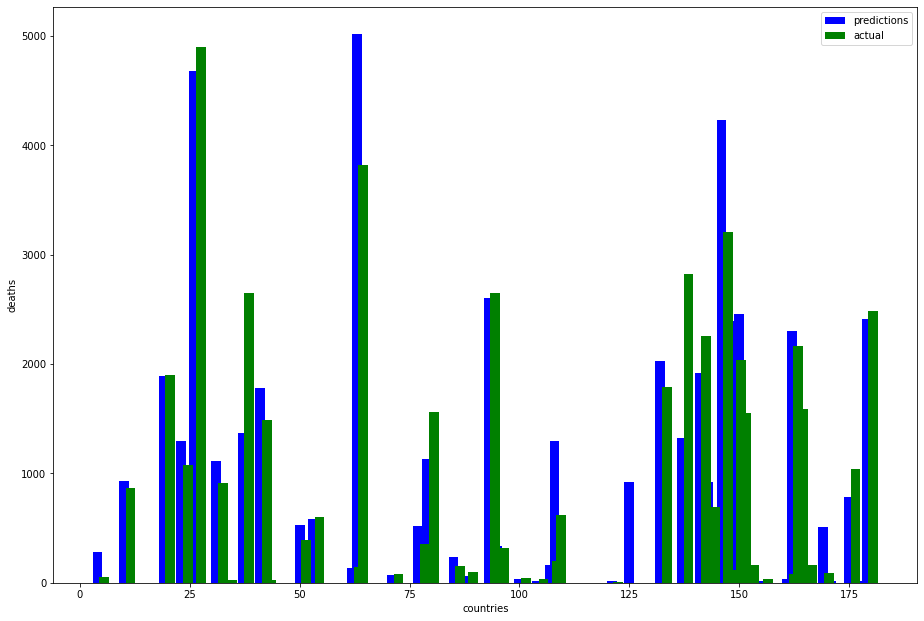

In [13]:
# plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_test_orig['location'].values + 0.0, x_test_pred_nn.reshape(48, ), color = 'b', width = 2.25)
# ax.bar(X['location'].values + 0.25, y_test.values.reshape(48, ), color = 'g', width = 0.25)
ax.bar(X_test_orig['location'].values + 1.50, y_test.values.reshape(48, ), color = 'g', width = 2.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xlabel("countries")
plt.ylabel("deaths")
ax.legend(labels=['predictions', 'actual'])

In [24]:
nn_model.save(brisk_neural_net.MODEL_SAVE_PATH)

In [21]:
from ml.models.base.brisk_model_lightning import BriskModel, BriskDataModule
from sklearn.model_selection import train_test_split
import pytorch_lightning as pl


In [19]:
clf = BriskModel(input_dim = 40)


In [27]:
X_scalar = StandardScaler().fit_transform(X_train)

X_scalar

,new_cases_per_million,population_cov,life_expectancy_cov,Population,Area_km2,Density_km2,Year_x,Meningitis,Neoplasms,"Fire, heat, and hot substances",...,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total,air_polution
144,0.172839,-0.288162,0.424252,-0.283278,-0.402022,0.022242,0.0,-0.378342,0.239083,-0.051878,...,-0.009505,1.461036,-0.016436,-0.124667,-0.209598,-0.648551,0.031821,0.359850,0.029802,-0.350254
154,2.680804,-0.273467,1.131720,-0.268350,-0.388998,-0.122698,0.0,-0.500812,1.625335,-0.931643,...,0.836701,-0.764317,-0.095089,0.709730,1.265352,-0.601520,2.204965,1.203002,0.975763,-0.562901
157,-0.361945,0.176154,-1.243547,0.170309,0.403482,-0.156620,0.0,0.036050,-0.488338,1.614256,...,-0.674371,-0.023453,-0.090726,-0.852900,-0.792569,-0.438879,-0.546020,-0.745467,0.574663,0.071859
8,0.079051,-0.089553,1.424655,-0.088679,4.674204,-0.183757,0.0,-0.516522,0.727436,-1.003608,...,-0.256128,-0.062250,0.570014,-0.959549,-0.558363,-0.609302,1.206787,1.136186,-0.354042,-1.144025
173,-0.153288,-0.278706,0.052556,-0.273767,-0.398991,-0.018464,0.0,-0.424882,0.017654,-0.160592,...,0.275179,1.917533,-0.620671,-0.541465,-0.105360,-0.578240,0.113031,0.017924,0.323504,-0.280503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,0.319917,-0.286451,0.205932,-0.281694,-0.387220,-0.175123,0.0,-0.465568,-0.657083,-0.527254,...,-0.816906,0.637475,-0.629125,-0.230739,-0.541662,-0.648551,-0.488580,-0.520958,-0.963068,-0.371758
98,1.703201,-0.268727,0.386945,-0.262655,-0.359281,-0.159087,0.0,-0.458155,1.384016,0.335022,...,3.343020,-1.033997,-0.232585,0.912452,2.134712,-0.613666,1.721561,1.187378,2.544196,-0.934373
66,0.936048,-0.209146,1.258843,-0.201865,-0.315287,-0.136266,0.0,-0.501363,1.926332,-0.541234,...,1.853185,1.857805,1.308740,-0.590645,0.244693,-0.286353,2.316310,2.468497,1.910941,-0.717339
126,0.332530,-0.273437,0.368981,-0.268310,-0.385407,-0.135650,0.0,-0.508171,1.180707,-0.857241,...,2.775715,-0.355284,-0.069473,-0.388691,-0.436643,-0.601636,-0.049348,0.879493,1.689676,0.316590


In [28]:
data_train = BriskDataModule(X_scalar, y_train, batch_size=64)
data_test = BriskDataModule(X_scalar, y_train, batch_size=64)
# data.setup()

In [29]:
trainer = pl.Trainer(min_epochs=10, max_epochs=50, enable_progress_bar=False)
trainer.fit(clf, data)

validation ended: MSE 1897442.0
validation ended: MSE 1897204.75
validation ended: MSE 1896811.5
validation ended: MSE 1896110.625
validation ended: MSE 1894888.5
validation ended: MSE 1892832.875
validation ended: MSE 1889514.0
validation ended: MSE 1884341.0
validation ended: MSE 1876602.0
validation ended: MSE 1865529.0
validation ended: MSE 1850493.375
validation ended: MSE 1831431.25
validation ended: MSE 1809683.75
validation ended: MSE 1789465.375
validation ended: MSE 1780288.125
validation ended: MSE 1798914.25
validation ended: MSE 1863102.5
validation ended: MSE 1962382.0
validation ended: MSE 2056829.125
validation ended: MSE 2122387.75
validation ended: MSE 2159193.25
validation ended: MSE 2177383.5
validation ended: MSE 2187097.0
validation ended: MSE 2195863.0
validation ended: MSE 2209091.75
validation ended: MSE 2230343.75
validation ended: MSE 2260299.5
validation ended: MSE 2295173.25
validation ended: MSE 2327903.0
validation ended: MSE 2352341.25
validation ended: 

In [31]:
trainer.validate(clf, data)

validation ended: MSE 2197625.0


[{}]

In [ ]:
trainer.test(clf, data)

In [ ]:
params = {
        'N_LAYERS' : 8,
        'MAX_N_NEURONS' : 256,
        'EPOCHS' : 300,
        'N_TRIALS' : 1000,
        'RANDOM_STATE' : 432,
        'TEMP_PATH' : "/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/temp/",
        'MODEL_SAVE_PATH' : "/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/base/brisk_nn_pytorch/",
        'DROP_LIST' : ['location'],
        'STD_DEMON' : 3,
        'NUM_RERUNS' : 5
}

In [6]:
import pprint
pprint(params)

NameError: name 'params' is not defined

Fit DNN Pytorch

In [5]:
best_pytorch = brisk_nn_pytorch.fetch_model()

2022-09-30 15:14:10,413 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-892z8jg0', purging
2022-09-30 15:14:10,414 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-sf1x5ouu', purging
2022-09-30 15:14:10,414 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-83zq909o', purging
2022-09-30 15:14:10,414 - distributed.diskutils - INFO - Found stale lock file and directory '/tmp/dask-worker-space/worker-8wks8wqt', purging


Dask dashboard is available at http://127.0.0.1:8787/status
########## Re-running the discovery process ###############
Starting train for trials:1000 with epochs:300


[I 2022-09-30 15:14:52,042] Trial 4 finished with value: 849429.125 and parameters: {'learning_rate': 0.0556998728419015, 'optimizer': 'Adam', 'batch_size': 512, 'n_layers': 5, 'n_units_l0': 202, 'n_units_l1': 174, 'n_units_l2': 252, 'n_units_l3': 180, 'n_units_l4': 156}. Best is trial 4 with value: 849429.125.
[I 2022-09-30 15:14:59,740] Trial 12 finished with value: 5370762.5 and parameters: {'learning_rate': 0.04985527571629453, 'optimizer': 'Adam', 'batch_size': 64, 'n_layers': 1, 'n_units_l0': 38}. Best is trial 4 with value: 849429.125.
[I 2022-09-30 15:15:11,917] Trial 7 finished with value: 1555972.125 and parameters: {'learning_rate': 0.034619974193629825, 'optimizer': 'Adam', 'batch_size': 2048, 'n_layers': 5, 'n_units_l0': 141, 'n_units_l1': 88, 'n_units_l2': 248, 'n_units_l3': 47, 'n_units_l4': 201}. Best is trial 4 with value: 849429.125.
[I 2022-09-30 15:15:15,397] Trial 6 finished with value: 1555972.125 and parameters: {'learning_rate': 0.013715059200248817, 'optimizer'

Number of trials: 1000
Best trial:
Model saved at:/mnt/c/Users/rwmas/GitHub/xai/xai_api/app/ml/models/saved/base/brisk_nn_pytorch/


In [13]:
X_test

,new_cases_per_million,population_cov,life_expectancy_cov,Population,Area_km2,Density_km2,Year_x,Meningitis,Neoplasms,"Fire, heat, and hot substances",...,Cardiovascular diseases,Chronic kidney disease,Chronic respiratory diseases,Cirrhosis and other chronic liver diseases,Digestive diseases,Acute hepatitis,Alzheimer's disease and other dementias,Parkinson's disease,Total,air_polution
171,0.000,1.368000e+03,81.86,1.319000e+03,5.0,110.0,2019.0,0.000000,0.151630,0.000000,...,0.303260,0.075815,0.075815,0.000000,0.000000,0.000000,0.000000,0.000000,0.682335,6.84874
26,144336.090,6.896655e+06,75.05,7.051608e+06,42818.0,64.0,2019.0,0.000553,0.312113,0.001659,...,1.121999,0.027653,0.043054,0.038388,0.063915,0.000128,0.044614,0.014181,1.770022,19.92702
41,140487.169,5.139053e+06,80.28,4.999441e+06,19730.0,98.0,2019.0,0.000700,0.120994,0.000420,...,0.133295,0.027443,0.028503,0.019202,0.035524,0.000060,0.025903,0.004380,0.474053,17.43615
4,2898.709,3.393361e+07,61.15,3.080979e+07,481351.0,25.0,2019.0,0.008179,0.041516,0.001665,...,0.083493,0.007997,0.012769,0.018390,0.029117,0.000798,0.003710,0.000867,0.562613,28.02152
85,26254.785,1.260508e+08,84.63,1.272022e+08,145919.0,337.0,2019.0,0.000320,0.347851,0.001271,...,0.292828,0.035631,0.043862,0.020635,0.047799,0.000082,0.129616,0.013168,1.076846,13.64744
141,86437.428,1.459120e+08,72.58,1.457340e+08,6601633.0,9.0,2019.0,0.000784,0.203674,0.004528,...,0.689565,0.007995,0.027029,0.031634,0.062365,0.000039,0.033237,0.006443,1.219497,11.77739
62,4776.945,2.486937e+06,62.05,2.280094e+06,4361.0,202.0,2019.0,0.009298,0.046928,0.001974,...,0.114162,0.013596,0.018596,0.015657,0.027411,0.000921,0.006754,0.002149,0.551293,58.21450
145,164.879,2.001440e+05,73.32,1.961290e+05,1097.0,69.0,2019.0,0.001020,0.079030,0.001020,...,0.274819,0.031102,0.053536,0.015296,0.028043,0.000510,0.014276,0.005099,0.676086,10.83320
53,20727.009,6.518500e+06,73.32,6.420746e+06,8124.0,305.0,2019.0,0.000810,0.091968,0.000654,...,0.150995,0.063591,0.023580,0.023362,0.037877,0.000093,0.026399,0.004750,0.622155,22.34945
100,2161.074,2.842733e+07,67.04,2.626231e+07,226755.0,45.0,2019.0,0.007935,0.041927,0.001542,...,0.134782,0.007379,0.022961,0.017226,0.027374,0.000948,0.003271,0.000792,0.597670,17.85980


In [56]:
X_test = StandardScaler().fit_transform(X_test)     
X_test_tensor = helper.df_to_tensor(X_test)

In [57]:
X_test_tensor.shape

torch.Size([48, 40])

In [64]:
pred_dnn = best_pytorch(X_test_tensor)

In [65]:
mean_squared_error(helper.torch_tensor_to_numpy(pred_dnn), y_test)

131241.51819139413

In [18]:
def get_rerun_status(pred, y_test):

    pred = helper.torch_tensor_to_numpy(pred)
    y_test = y_test.values
    
    std_demon = 3
    ul = y_test.mean() + y_test.std()/std_demon
    ll = y_test.mean() - y_test.std()/std_demon



    mean_pred = pred.mean()

    print(mean_pred)
    print(ul)


    if (mean_pred < ul) & (mean_pred > ll):
        return False

    else: 
        return True



In [62]:
get_rerun_status(pred_dnn, y_test)

NameError: name 'get_rerun_status' is not defined

In [66]:
df_dnn = pd.DataFrame(list(zip(X_train_orig['location'].values, y_test.values.reshape(y_test.shape[0], ), 
                                    helper.torch_tensor_to_numpy(pred_dnn).reshape(pred_dnn.shape[0]) )),
               columns =['countary', 'deaths', 'predictions'])
df_dnn


,countary,deaths,predictions
0,144,0.000,72.942856
1,154,4896.644,4684.351562
2,157,1486.844,1270.367188
3,8,55.799,125.158325
4,173,153.473,866.250610
5,80,2252.476,1972.265503
6,52,146.353,40.099644
7,24,0.000,35.251743
8,82,604.743,795.203308
9,182,45.966,130.282318


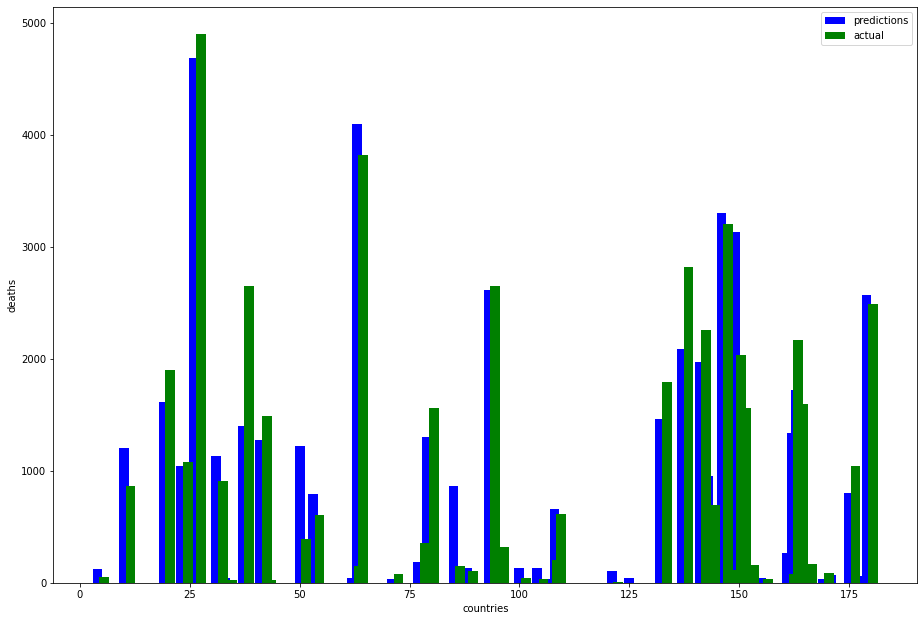

In [68]:
# plt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
ax = fig.add_axes([0,0,1,1])
ax.bar(X_test_orig['location'].values + 0.0, df_dnn.predictions.values, color = 'b', width = 2.25)
# ax.bar(X['location'].values + 0.25, y_test.values.reshape(48, ), color = 'g', width = 0.25)
ax.bar(X_test_orig['location'].values + 1.50, y_test.values.reshape(48, ), color = 'g', width = 2.25)
# ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)
plt.xlabel("countries")
plt.ylabel("deaths")
ax.legend(labels=['predictions', 'actual'])